# Quick intro

This is a jupyter notebook for testing / coding. So far, each code block is a separate test; unlike an ordinary notebook, they are not meant to run sequentially.

First, test to see jupyter is running correctly at all:


In [2]:
import os
import sys

print("hi!!nn!")

print(sys.executable)
print(sys.path)

import pyro
import hessian

hi!!nn!
C:\Users\jameson\Anaconda3new\python.exe
['C:\\Users\\jameson\\Dropbox\\eipython\\eipython', 'C:\\Users\\jameson\\Anaconda3new\\python37.zip', 'C:\\Users\\jameson\\Anaconda3new\\DLLs', 'C:\\Users\\jameson\\Anaconda3new\\lib', 'C:\\Users\\jameson\\Anaconda3new', '', 'C:\\Users\\jameson\\Anaconda3new\\lib\\site-packages', 'C:\\Users\\jameson\\Anaconda3new\\lib\\site-packages\\win32', 'C:\\Users\\jameson\\Anaconda3new\\lib\\site-packages\\win32\\lib', 'C:\\Users\\jameson\\Anaconda3new\\lib\\site-packages\\Pythonwin', 'C:\\Users\\jameson\\Anaconda3new\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\jameson\\.ipython']


ModuleNotFoundError: No module named 'hessian'

Next, running "ei". This started out as a copy of Fritz's code but it's evolved into a working version of ours.

In [1]:
from importlib import reload
import ei #import *
reload(ei)
from ei import *
import cProfile as profile

%prun result = trainGuide()

Yes, I will run.


ModuleNotFoundError: No module named 'hessian'

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

Now, "toypyro", a minimal model to narrow in on and reproduce any bugs.


epoch 0 loss = 9970.42696261406
epoch 10 loss = 8222.381203889847
epoch 20 loss = 60.06933152675629
epoch 30 loss = 1137.6531113386154
epoch 40 loss = 1467.7961308956146
epoch 50 loss = 503.1370403766632
epoch 60 loss = 5752.136534690857
epoch 70 loss = 1244.33548527956
epoch 80 loss = 8540.950506448746
epoch 90 loss = 569.7613765001297
epoch 100 loss = 6894.649996995926
epoch 110 loss = 4175.3235194683075
epoch 120 loss = 472.6241273880005
epoch 130 loss = 1902.5091660022736
epoch 140 loss = 913.3949070572853
epoch 150 loss = 120.05118358135223
epoch 160 loss = 24.606423556804657
epoch 170 loss = 110.1393538415432
epoch 180 loss = 74.07718658447266
epoch 190 loss = 5440.085318565369
epoch 200 loss = 516.0992064476013
epoch 210 loss = 593.9815967679024
epoch 220 loss = 344.73766988515854
epoch 230 loss = 933.6469010710716
epoch 240 loss = 190.28482508659363
epoch 250 loss = 852.1514495611191
epoch 260 loss = 223.10303181409836
epoch 270 loss = 1054.054571211338
epoch 280 loss = 67.3725

epoch 2250 loss = -15.773172616958618
epoch 2260 loss = -16.03392219543457
epoch 2270 loss = -27.897440671920776
epoch 2280 loss = -20.802294731140137
epoch 2290 loss = -24.83900547027588
epoch 2300 loss = -30.2585289478302
epoch 2310 loss = -20.315150022506714
epoch 2320 loss = -22.15317392349243
epoch 2330 loss = -25.159435987472534
epoch 2340 loss = -20.672945022583008
epoch 2350 loss = -23.544315814971924
epoch 2360 loss = -21.54719305038452
epoch 2370 loss = -22.543355226516724
epoch 2380 loss = -23.42118239402771
epoch 2390 loss = -21.949904322624207
epoch 2400 loss = -31.188451051712036
epoch 2410 loss = -18.388630628585815
epoch 2420 loss = -18.03581702709198
epoch 2430 loss = -27.299959778785706
epoch 2440 loss = -27.348795413970947
epoch 2450 loss = -21.49933934211731
epoch 2460 loss = -24.72176694869995
epoch 2470 loss = -20.447677612304688
epoch 2480 loss = -27.689104080200195
epoch 2490 loss = -24.22283685207367
epoch 2500 loss = -22.203494548797607
epoch 2510 loss = -19.9

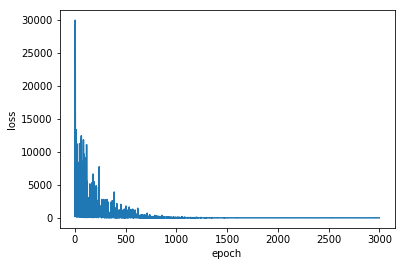

In [15]:
from importlib import reload
import demo #import *
reload(demo)
from demo import *
import cProfile as profile


result = trainGuide()

Next, run "polytopize", which has all of my pre-Fritz attempts to code.

In [29]:
import torch
ts = torch.tensor
import pyro.distributions as dist
import pyro
import cmult

t1 = ts([3.,4.])
t2 = ts([2.,5.])

m = t1.view(-1,1).mm(t1.view(1,-1))

print(m)

#means = torch.zeros(3,2)
#means[1,1] = 100.
with pyro.plate('dumb',3):
    #t3 = pyro.sample('irrelevant',dist.Normal(means,ts(1.)).to_event(1))
    t3 = pyro.sample('irrelevant',cmult.CMult(50,torch.ones(3,3,3)/3).to_event(2))

#print(t3)

mult = cmult.CMult(50,torch.ones(3)/3)
print(mult.log_prob(ts([0.,50,0])))
print(mult.log_prob(ts([0.,1,0])))

tensor([[ 9., 12.],
        [12., 16.]])
tensor(-54.9306)
tensor(-1.0986)


In [6]:
yhat1 = polytopize(4,3,pyro.get_param_store()["what_0"],
                 get_indep(4,3,ts([68.,20,25,56]),ts([63.,32,74])))

erchat = pyro.get_param_store()["erchat"]

print(pyro.get_param_store()["what_0"])
print(erchat)
print(recenter_rc(erchat))
print(pyro.get_param_store()["logsdrchat"])

tensor([[-0.3764, -0.7578],
        [-0.0823,  0.0420],
        [ 0.0860,  0.2053]], requires_grad=True)
tensor([[-0.0440, -0.0448,  0.1284],
        [-0.0490, -0.0334,  0.1120],
        [-0.0486, -0.0243,  0.0850],
        [-0.0567, -0.0134,  0.0715]], requires_grad=True)
tensor([[ 0.0031, -0.0173,  0.0341],
        [-0.0019, -0.0059,  0.0177],
        [-0.0015,  0.0032, -0.0093],
        [-0.0096,  0.0141, -0.0227]], grad_fn=<SubBackward0>)
tensor(-3.1610, requires_grad=True)


In [ ]:
import pstats
p = pstats.Stats(runstats)
p.strip_dirs().sort_stats(-1).print_stats()

In [4]:
import sys
import hessian

from importlib import reload
import polytopize #import *
reload(polytopize)
from polytopize import *

import tests


Yes, I will run.
Yes, I will run.
ge fail
loc tensor([[ 0.3147],
        [ 2.4440],
        [-4.0535],
        [ 2.2007]])
polytopedLoc tensor([[ 2.1063e-01,  2.1136e-02],
        [ 2.8514e-01, -1.8626e-09],
        [ 3.4959e-01,  9.9957e-02],
        [ 3.5462e-01,  1.1892e-02],
        [ 2.5462e+00,  3.2228e-01]])
ge fail
loc tensor([[-5.8855],
        [-5.2805],
        [ 5.4654],
        [ 0.1889]])
polytopedLoc tensor([[ 2.8885e-01,  1.1871e+00],
        [ 8.5629e-01,  2.0505e+00],
        [ 3.9984e-01, -1.4901e-08],
        [ 9.5542e-01,  1.5538e+00],
        [ 1.0063e+00,  9.9522e-01]])
Reloading cmult...
callable? <bound method TorchDistributionMixin.__call__ of Multinomial()>
callable? <bound method TorchDistributionMixin.__call__ of TorchCMult()>
Sampling multinomial: tensor([1., 2.])
Sampling cm2: tensor([0., 3.])
tensor(5.6022, grad_fn=<NegBackward>) tensor([[112.2500]])


# Test rank1torch (to get yhat from pi,n,v)

In [10]:
from importlib import reload
import rank1torch #import *
reload(rank1torch)
from rank1torch import *

test_solver()

Testing optimize_Q (50 tests): 
R=3, C=5, tolerance=0.001
Oh no! In test 3, Q has some negative entries:
	 trueQ[2][4]=0.00010659269901225343, 
	     Q[2][4]=-0.00021605131041724235
Oh no! In test 5, Q has some negative entries:
	 trueQ[1][4]=0.00011974151857430115, 
	     Q[1][4]=-1.1631345842033625e-06
Oh no! In test 8, Q has some negative entries:
	 trueQ[0][1]=2.882161788875237e-05, 
	     Q[0][1]=-0.0004783869662787765
Oh no! In test 15, Q has some negative entries:
	 trueQ[2][3]=0.0007846675580367446, 
	     Q[2][3]=-6.166117964312434e-05
Oh no! In test 28, Q has some negative entries:
	 trueQ[0][4]=8.13114020274952e-05, 
	     Q[0][4]=-0.00018321917741559446
Oh no! In test 40, Q has some negative entries:
	 trueQ[2][3]=0.00032634526723995805, 
	     Q[2][3]=-0.000617634505033493
Oh no! In test 47, Q has some negative entries:
	 trueQ[2][1]=0.00017936740186996758, 
	     Q[2][1]=-0.00041433278238400817
Oh no! In test 48, Q has some negative entries:
	 trueQ[0][0]=4.52485837740823

Finally, this is a cell for directly experimenting with pytorch and/or pyro. Basically, for getting the tensor syntax right. 

In [ ]:
import torch
import cmult
import pyro
from importlib import reload
reload(cmult)
from cmult import CMult

#print(CMult(probs=torch.tensor([1., 1., 1., 1.])).log_prob(torch.tensor([1.2, 1.5, 1., 1.])))

#print(CMult(100, torch.tensor([ 1., 1., 1., 1.])).sample())

R, C = (3,4)

y = pyro.distributions.Normal(0.,4.).sample(torch.Size([R-1,C-1]))


w = torch.cat((y,-y.sum(1).unsqueeze(1)),1)
w = torch.cat((w,-w.sum(0).unsqueeze(0)),0)

#print(w)
b = w.argmax()
print(b)
print(w,w[b//C,b % C])

tt = torch.zeros(R,C)
print(tt,R,C,tt[:(R-1),:(C-1)])

## Overview

Most SVI problems in pyro are coded as a model, a generic guide (such as: multivariate Gaussian in all parameters), and specific observations/data (passed as arguments to svi.step). For EI, that's going to be different; the observations are going to be built into the guide function, leaving nothing to include in the "data" argument to svi.step.

That means there is a lot of work for the guide to do. As usual, it must establish reasonable distributional families for the posterior of each of the hyperparameters. But for the latent parameters, the job of the guide is to take a "relative strength" number for each race/candidate/precinct combo, and turn that into a number of votes for each combo, such that those numbers obey all the constraints set by observations. This means that for each precinct (considered separately), the latent guide must:

-Find the "center point" where candidate preference is independent of race.

-Find the "basis vectors" (actually, there are more than enough of them to form a basis) which determine the directions to move in the space.

-For any given set of "relative strengths" which is a distance $d$ in a direction $\theta$, find the first constraint violated when moving in that direction, and the distance $r$ between the origin and that constraint.

-Project the "relative strengths" onto the numbers of votes, by moving $r(1-e^{-d})$ in direction $\theta$.

#### a = zs(2,2,2,2)
a[0,1,1,1] = 2
print(a[1,1])
print(a[0,1])
print(torch.max(a))
print(torch.distributions.exponential.Exponential(ts([1])).sample(4))

In [ ]:
print("hi","world")
a = zs(2,2,2,2)
a[0,1,1,1] = 2 
print(torch.max(a[0,1])) 
print(pyro.distributions.Exponential(1.).sample(torch.Size([3])))
a.add_(torch.ones(2,2,2))
print(torch.exp)